In [ ]:
!pip install shap

import pandas as pd
import numpy as np
import seaborn as sns
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


np.random.seed(2)

df= pd.read_csv('lidija2-NN1.csv', header=None)
df.columns= ['O22', 'O32', 'C2', 'O21', 'O31', 'C1', 'predict']

# target variable is 'predict' 
y= df['predict']
X= df.iloc[:,0:6]  # X = all rows and all columns but the last one
#print(df.iloc[1,:])

# split into training and test sets

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state= 2)

# build the model
#eval_set = [(X_train, y_train),(X_test,y_test)]
model= xgb.XGBRegressor(
    n_estimators= 1000,
    objective= 'reg:squarederror',
    learning_rate= 0.02,
    subsample= 0.4,
    max_depth= 5,
    min_child_weight=5
)
model.fit(X_train, y_train)
#model.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)
explainer= shap.TreeExplainer(model)

# beeswarm plot
#shap_values= explainer.shap_values(X)
#sns.swarmplot(shap_values)

print('molto bene')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 15.8 MB/s 
molto bene


In [ ]:
# R-squared testing
r_squared = model.score(X_train, y_train)
print('intrinsic function for model r_squared =', r_squared)

p= model.predict(X_train)
print(p[2])
print(y_train.iloc[2])
print(y.iloc[2])
y_mean=0
for i in range(0,1500):
  y_mean= y_mean + y_train.iloc[i]
y_mean= y_mean/1500
print(y_mean)

intrinsic function for model r_squared = 0.9961477145221348
0.34004307
0.339
0.347
0.3486180000000009


In [ ]:
# calculate R-squared or XGB model
r_squared = model.score(X_train, y_train)
print('intrinsic function for model r_squared =', r_squared)

y_predict= model.predict(X_train)
sse= 0
for i in range(0, 1500):
  sse = sse + (y_predict[i] - y_train.iloc[i])**2
sst= 0
for i in range(0, 1500):
  sst = sst + (y_train.iloc[i] - y_mean)**2

R2= 1 - (sse/sst)
print('computed r-squared=', R2)


intrinsic function for model r_squared = 0.9961477145221348
computed r-squared= 0.9961451941583794


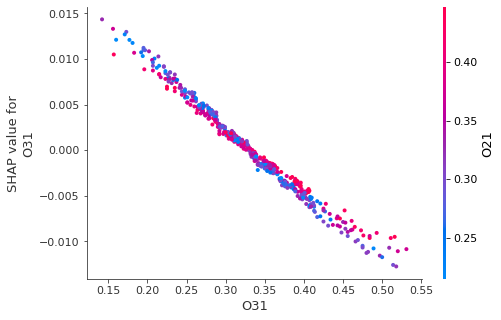

In [ ]:
# dependence plot
shap_values= explainer.shap_values(X_test)
shap.dependence_plot(4, shap_values, X_test, show= False)
plt.savefig('1d.png', bbox_inches='tight')

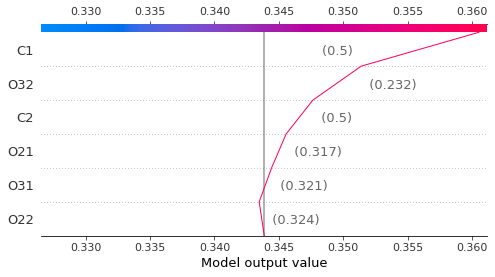

In [ ]:
#idx= 113  # coordinated but sum<= 1.0
#idx= 285  # subsidized
#idx= 102  # subsidized
#idx= 180  # subsidized
idx= 231  # subsidized
#idx= 251  # subsidized
#idx= 49  # uncoordinated 
shap_values= explainer.shap_values(X.iloc[idx])

# decision plot
shap.decision_plot(explainer.expected_value, shap_values[0], X.iloc[idx,:], show=False)
plt.savefig('1s.png', bbox_inches='tight')

 98%|===================| 1955/2001 [00:37<00:00]       

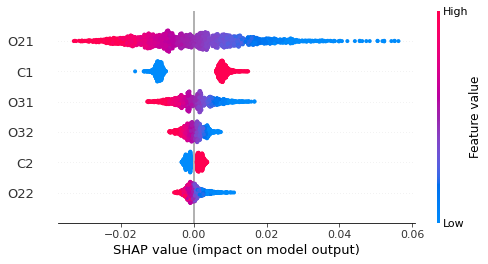

In [ ]:
import seaborn as sns

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.beeswarm(shap_values, show= False)
plt.savefig('1b.png', bbox_inches= 'tight')